<a href="https://www.kaggle.com/code/abdelfattahsaleh/superstore-analytics?scriptVersionId=96841851" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<a id='1'></a>
## <h1 style="color:Blue;">Porject Intro:</h1>
This project main target is to derive insights out of the dataset enabling the decision makers to take informed_decision based on their business historical data.

The flow will start with exploring the data both visually & programatically.
Then a data assessing & cleaning will be performed preparing our data for the analysis

## <h1 style="color:Blue;">Table of content:</h1>
* [1. Target Insights](#2)
* [2. Data Assessment](#3)
* [3. Data Preprocessing](#4)
* [4. EDA](#5)
* [5. Insights Extraction](#6)

# <h2 style="color:Blue;">Target Insights:</h2>
<a id='2'></a>

#### 1. General insights:

        1.1 Defining the best sales season of the store.

        1.2 What is the average number of products per order?

##### 2. Discuonts Vs Sales analysis.

##### 3. Sales per year analysis.

##### 4. Seasons Vs Sales analysis.

##### 5. Number of products per order analysis.

##### 6. Customer Segment Vs Sales analysis.

##### 7. Region Vs Sales analysis.

##### 8. Product Categorey Vs Sales analysis.

##### 9. Product Sub-Categorey Vs Sales analysis.

In [3]:
# Creating dataframe.
df=pd.read_csv('/kaggle/input/superstore-dataset-final/Sample - Superstore.csv',encoding='windows-1252')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [4]:
# Renaming the column 
df.columns = df.columns.str.replace(' ', '_')
df

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


<a id='3'></a>
# <h3 style="color: Blue;">Data Assessment:<h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9994 non-null   int64  
 1   Order_ID       9994 non-null   object 
 2   Order_Date     9994 non-null   object 
 3   Ship_Date      9994 non-null   object 
 4   Ship_Mode      9994 non-null   object 
 5   Customer_ID    9994 non-null   object 
 6   Customer_Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal_Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product_ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product_Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

<a id='4'></a>
# <h3 style="color: Blue;"> Data preprocessing: <h3>

In [6]:
# date data type correction:
df['Order_Date']=pd.to_datetime(df['Order_Date'])
df['Ship_Date']=pd.to_datetime(df['Ship_Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row_ID         9994 non-null   int64         
 1   Order_ID       9994 non-null   object        
 2   Order_Date     9994 non-null   datetime64[ns]
 3   Ship_Date      9994 non-null   datetime64[ns]
 4   Ship_Mode      9994 non-null   object        
 5   Customer_ID    9994 non-null   object        
 6   Customer_Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal_Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product_ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
#check for duplicates
df.duplicated().sum()

0

In [8]:
# data stats.
df.describe()

,Row_ID,Postal_Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### The min value of profit seems strange as -6599.978000

In [9]:
df[df['Profit']==-6599.978000]

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Postal_Code,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,43130,East,TEC-MA-10000418,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,4499.985,5,0.7,-6599.978


#### The profit min value will remain the same as this customer has 70% discount on the amount of 5 3D printers with high price.

<a id='5'></a>
# <h3 style="color: Blue;">EDA: <h3>

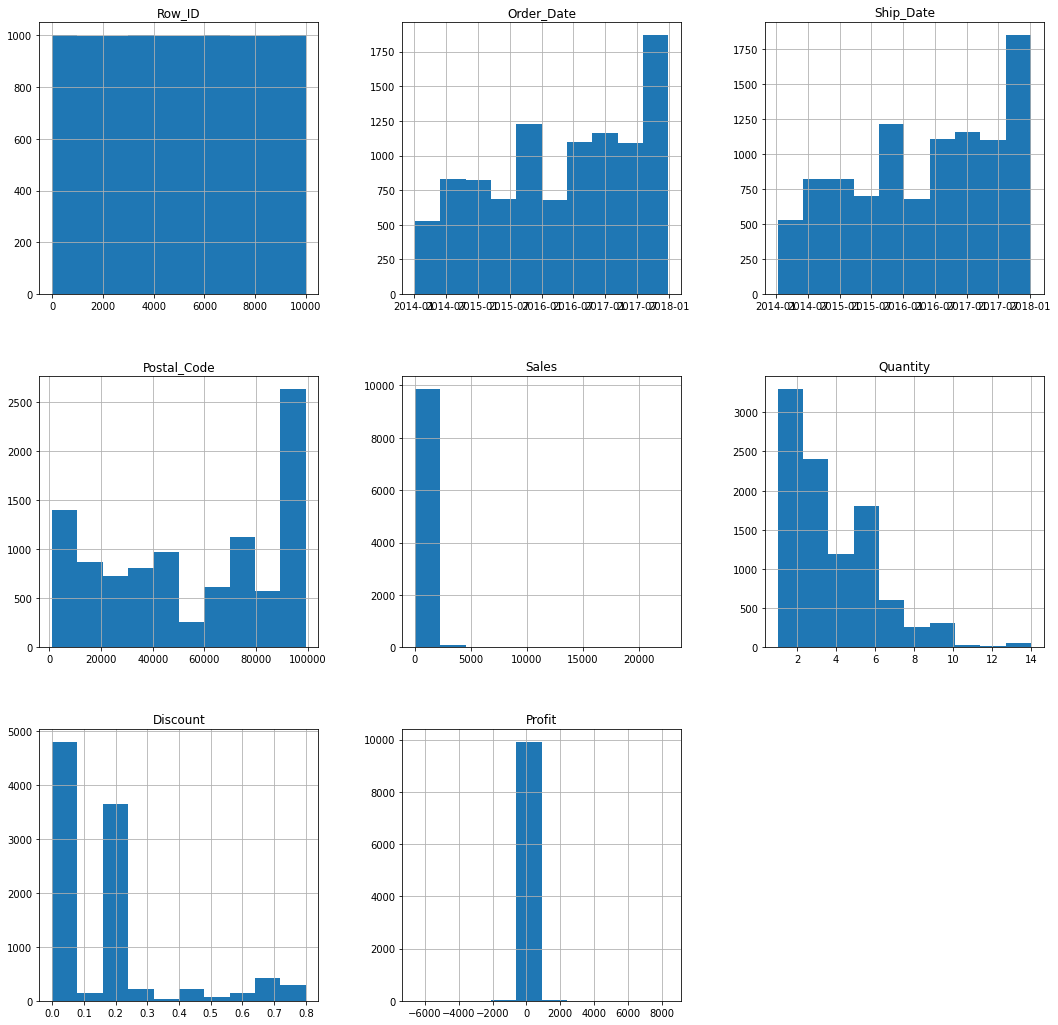

In [10]:
df.hist(figsize=(18,18));

<a id='6'></a>
# <h3 style="color: Blue;"> Insights extraction: <h3>

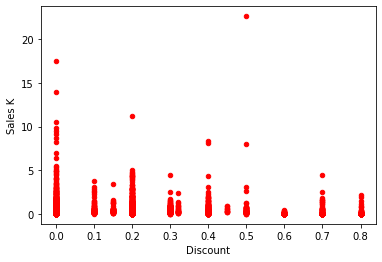

In [11]:
# Discount effect on sales analysis.
df['Sales']=df['Sales']/1000
df.plot.scatter(x='Discount', y= 'Sales', c = 'red', ylabel='Sales K');

#### 1. Based on the data, The discount has no clear impact on sales volume.

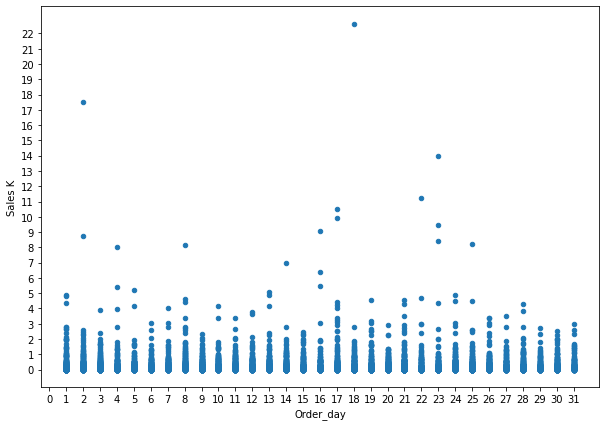

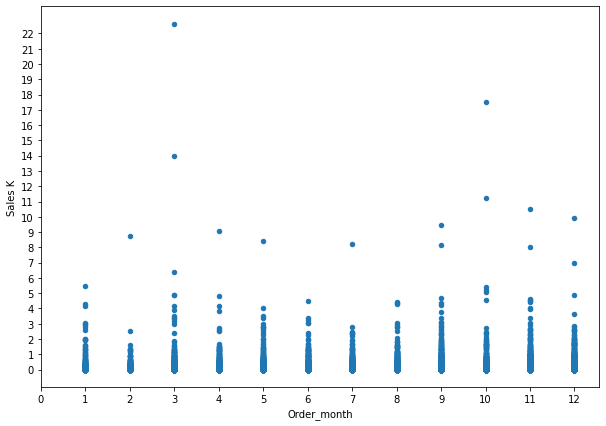

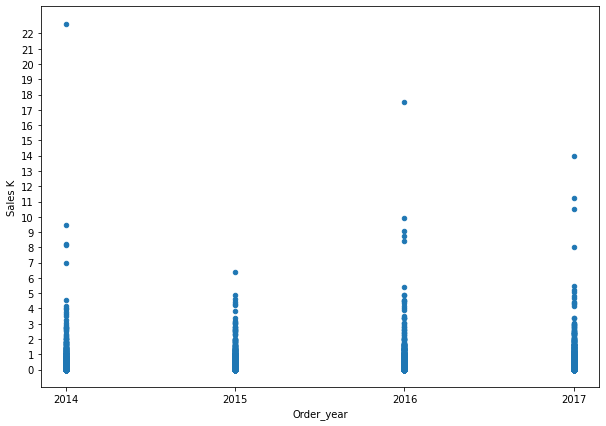

In [12]:
# Getting insights for Sales season.
df['Order_day']=df['Order_Date'].dt.day
df['Order_month']=df['Order_Date'].dt.month
df['Order_year']=df['Order_Date'].dt.year
df.plot.scatter(x='Order_day', y='Sales', ylabel='Sales K', xticks=(np.arange(0,32,1)), yticks=(np.arange(0,max(df['Sales']),1)), figsize=(10,7));
df.plot.scatter(x='Order_month', y='Sales', ylabel='Sales K',xticks=(np.arange(0,13,1)), yticks=(np.arange(0,max(df['Sales']),1)), figsize=(10,7));
df.plot.scatter(x='Order_year', y='Sales', ylabel='Sales K',xticks=(np.arange(2014,max(df['Order_year'])+1,1)), yticks=(np.arange(0,max(df['Sales']),1)), figsize=(10,7));

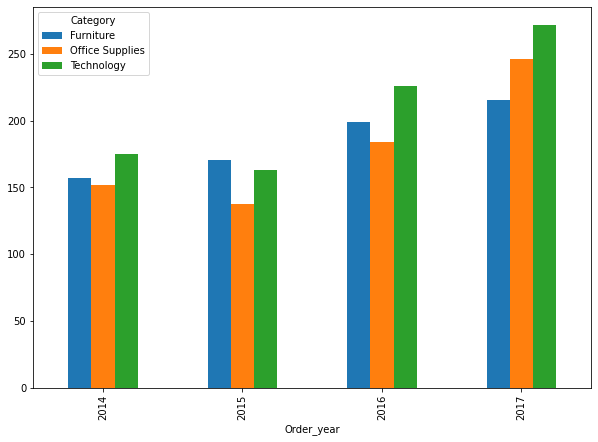

In [13]:
df.groupby(['Order_year','Category'])['Sales'].sum().unstack('Category').plot.bar(figsize=(10,7), legend='Category');


#### 2. Sales has increased in 2016 & 2017 as a normal growth. 

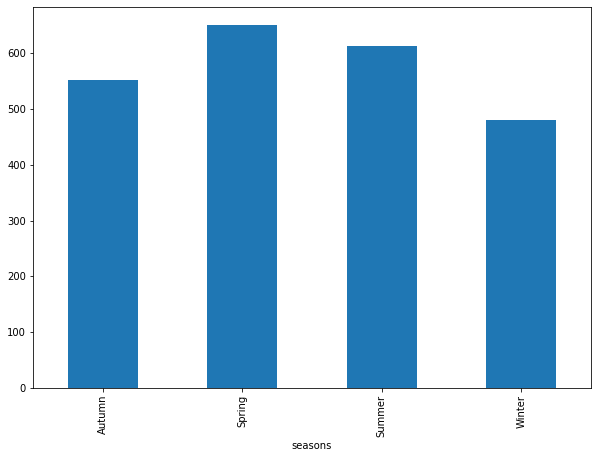

In [14]:
# Season Effect
conditions = [
    df['Order_month'].isin(np.arange(3,7)),
    (df['Order_month'].isin(np.arange(7,10))), (df['Order_month'].isin(np.arange(10,12))),
]
choices = ['Spring','Summer','Autumn']
df['seasons'] = np.select(conditions, choices, default='Winter')
df.groupby('seasons')['Sales'].sum().plot.bar(figsize=(10,7));

Category   Furniture  Office Supplies  Technology
seasons                                          
Autumn    179.373565       155.243705  218.166786
Spring    192.831453       200.255072  257.428583
Summer    200.641648       207.029867  206.260591
Winter    169.153130       156.518388  154.298073


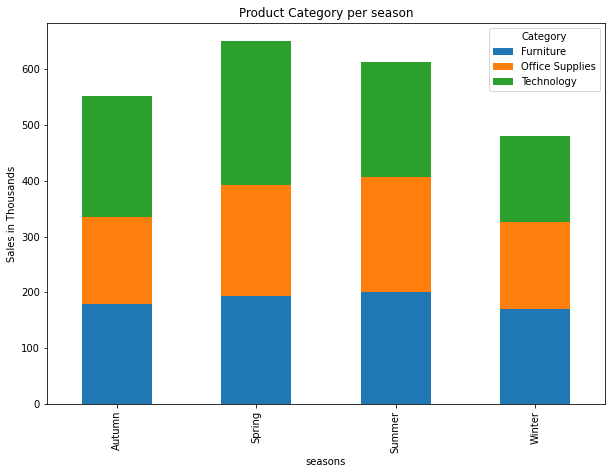

In [15]:
Cat_sales=df.groupby(['seasons','Category'])['Sales'].sum().unstack('Category')
print(Cat_sales, end='\n')
Cat_sales.plot.bar(figsize=(10,7), stacked=True, title='Product Category per season', ylabel='Sales in Thousands');

#### 3.1 Sales are slightly more in Spring & Summer. Decreases in Winter, need to take marketing action.
#### 3.2. No dominant category per season.

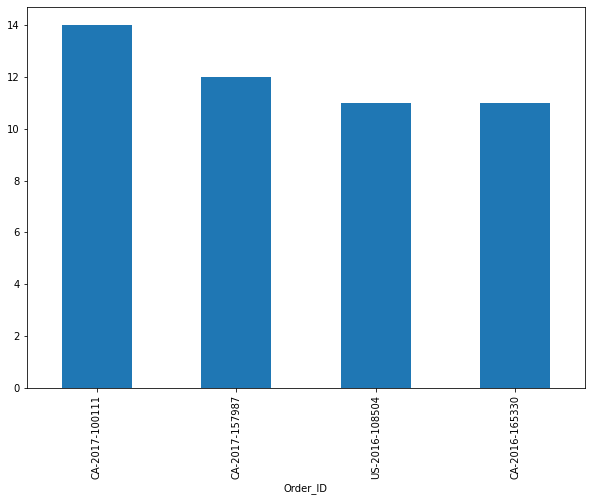

In [16]:
# Number of products per order analysis.
df.groupby('Order_ID')['Product_ID'].count().max()
df.groupby('Order_ID')['Product_ID'].count().mean()
df.groupby('Order_ID')['Product_ID'].count().mode()
ax=df.groupby('Order_ID')['Product_ID'].count().sort_values(ascending=False)
ax[ax>10].plot.bar(figsize=(10,7));

#### 4. Number of orders above 10 products are only 4...need to study how to expand vertically.

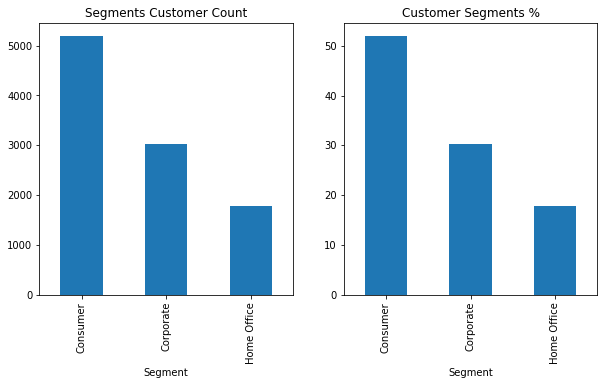

In [17]:
# Analyzing customer segments:
fig, axs = plt.subplots(1,2)
df.groupby('Segment')['Customer_ID'].count().plot.bar(ax=axs[0], figsize=(10,5), title='Segments Customer Count');
df.groupby('Segment')['Customer_ID'].count()
total_customers=df.groupby('Segment')['Customer_ID'].count().sum()
(df.groupby('Segment')['Customer_ID'].count()/total_customers*100).plot.bar(ax=axs[1],figsize=(10,5), title='Customer Segments %');


#### 5. Individual consumers are representing more than 50% of the overall customers count.

In [18]:
# Function for plotting features againest Sales:
def Sales_features (ftr):
    ax=df.groupby(ftr)['Sales'].sum().plot.bar(title =('Sales Vs '+ ftr), ylabel='Sales in Thousands', figsize=(15,7));
    return ax

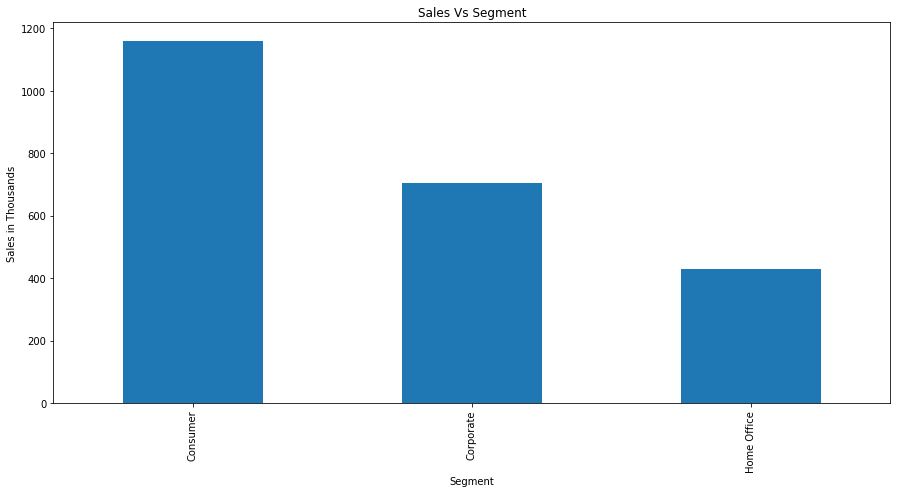

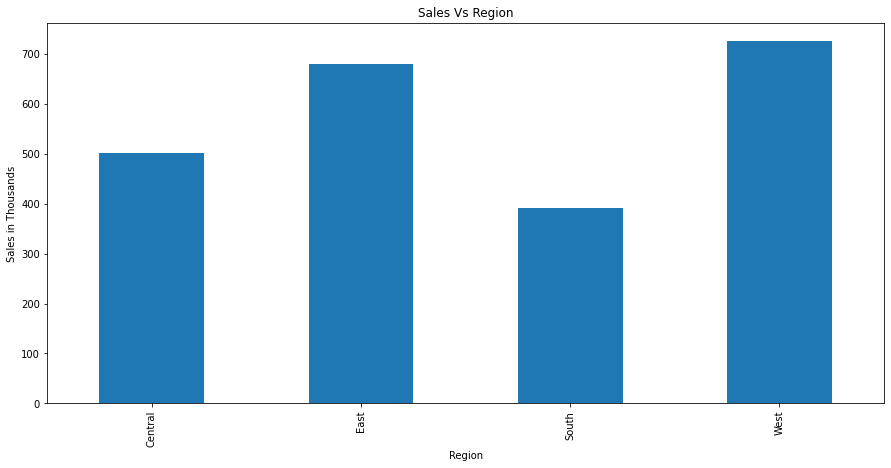

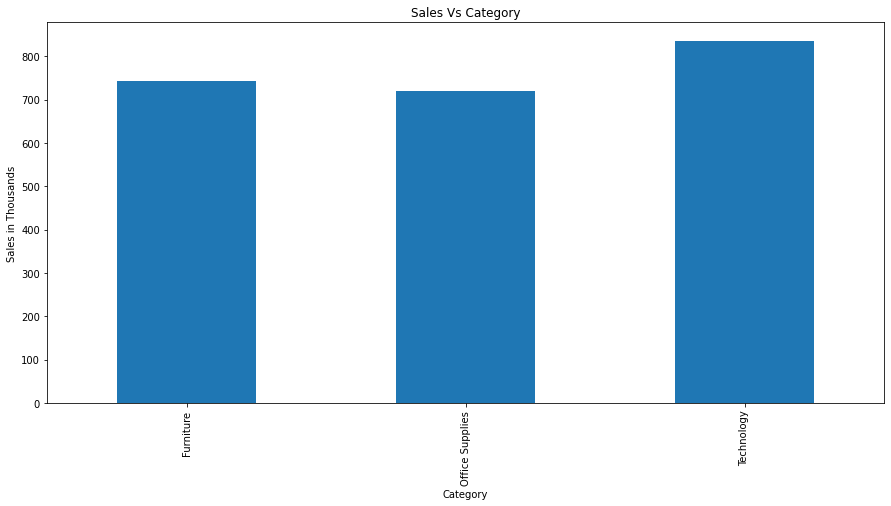

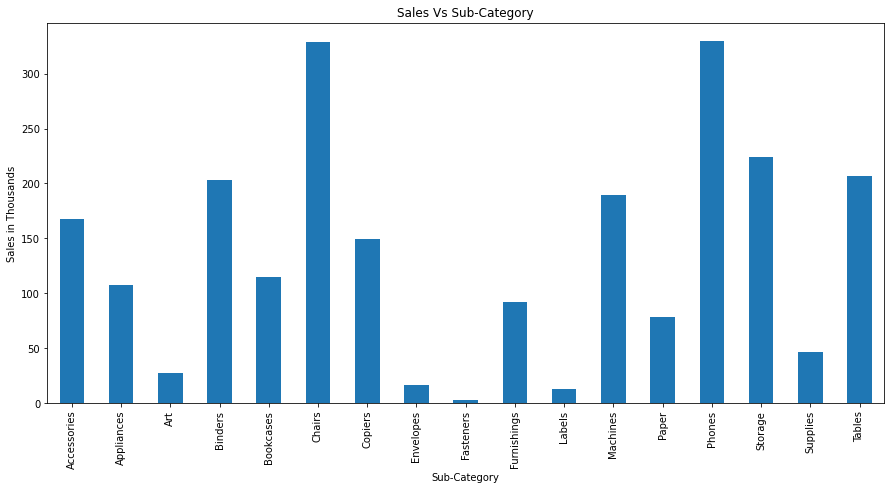

In [19]:
# Features againest Sales analysis:
fig1=plt.figure(1)
Sales_features('Segment')
fig1.show();
fig2=plt.figure(2)
Sales_features('Region')
fig2.show();
fig3=plt.figure(3)
Sales_features('Category')
fig3.show();
fig4=plt.figure(4)
Sales_features('Sub-Category')
fig4.show();

Orders per Segment
 Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Order_ID, dtype: int64
Sales per segment
 Segment
Consumer       1161.401345
Corporate       706.146367
Home Office     429.653148
Name: Sales, dtype: float64


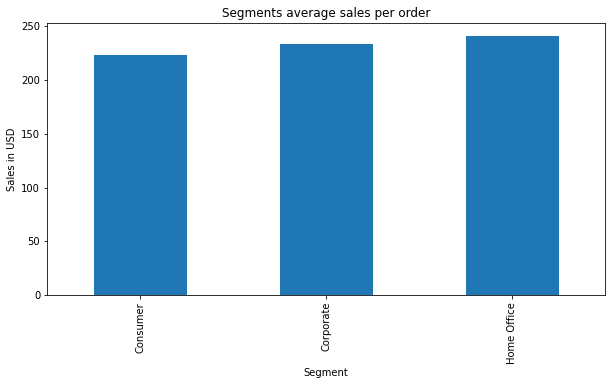

In [20]:
# Segments orders sales volume analysis:
OrdersperSegment=df.groupby('Segment')['Order_ID'].count()
print('Orders per Segment\n',OrdersperSegment)
Salespersegment= df.groupby('Segment')['Sales'].sum()
print('Sales per segment\n',Salespersegment)
AV_SalesperSegment= (Salespersegment/OrdersperSegment)*1000
AV_SalesperSegment.plot.bar(figsize=(10,5), title='Segments average sales per order', ylabel='Sales in USD');

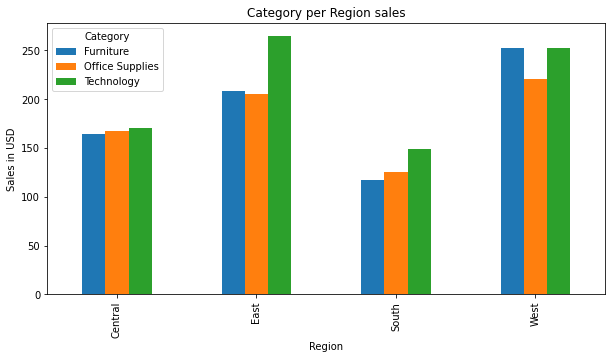

In [21]:
# Region/Category analysis:
df.groupby(['Region','Category'])['Sales'].sum()
df.groupby(['Region','Category'])['Sales'].sum().unstack('Category').plot.bar(figsize=(10,5),title='Category per Region sales', ylabel='Sales in USD');

### Sales Vs Segment:
#### 6.1 Normally, Consumer segment is the domenant segment.
#### 6.2 Average sales per order in segment "Home office" is higher than other categories lowest number of orders**---Need more marketing activities on this segment.**

### Sales Vs Region:
#### 7.1 East & West have higher sales volume. South is the lowest.
#### 7.2 Category per region distribution is illustrated in the chart...Central region needs more attention on technology category sales.

#### 8. Sales Vs Category: Technology is slightly higher in terms of sales volume.

#### 9. Sales Vs Sub-Categoty:chairs & phones are the most selling sub-category. labels, art & fastners are the lowest.